# ESTUDIO PREVIO Y LIMPIEZA DE LOS DATOS UTILIZADOS PARA EL MODELO
Hacemos un pequeño estudio previo de los datos de spotify que vamos a utilizar para entrenar nuestro modelo de predicción de popularidad.
Una vez cargado el modelo, observamos la naturaleza de los datos para analizar caules pueden ser relevantes para nuestro modelo. A grandes rasgos podemos diferenciar dos tipos:

- `Datos numéricos` - Son aquellos que describen diferentes propiedades (ya sean sonoras, de duración, de fecha) con un valor numérico. Son las que tendremos en cuenta para nuestro modelo de regresión estadística
- `Datos no numéricos` - Son los que describen otro tipo de atributos de la canción (ya sea el artista, nombre o el identificador). Estos datos los podemos descartar de entrada ya que su naturaleza no permitren que sean utilizados en un modelo estadístico.  

In [1]:
import pandas as pd

df = pd.read_csv("data.csv")
df.dropna(axis=0)

print('Columnas dataset: ', df.columns)
print('Forma dataset', df.shape)
df.head(5)

Columnas dataset:  Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')
Forma dataset (170653, 19)


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


## Una vez desechados los datos no numéricos, nuestro dataset queda con la siguiente apariencia:

In [2]:
df.dropna(axis=0, inplace=True)
df.drop_duplicates()

df.drop(axis=1, columns=['artists', 'name', 'id', 'release_date', 'duration_ms'], inplace=True)

print('Columnas dataset: ', df.columns)
print('Forma dataset', df.shape)
df.head(5)

Columnas dataset:  Index(['valence', 'year', 'acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo'],
      dtype='object')
Forma dataset (170653, 14)


,valence,year,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,1921,0.982,0.279,0.211,0,0.878000,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,1921,0.732,0.819,0.341,0,0.000000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,1921,0.961,0.328,0.166,0,0.913000,3,0.101,-14.850,1,5,0.0339,110.339
3,0.1650,1921,0.967,0.275,0.309,0,0.000028,5,0.381,-9.316,1,3,0.0354,100.109
4,0.2530,1921,0.957,0.418,0.193,0,0.000002,3,0.229,-10.096,1,2,0.0380,101.665


# Estudio de la correlación
Como vamos a hacer uso de un modelo de regresión, es conveniente utilizar los datos que tengan un mayor grado de correlación con la variable a predecir, en este caso la popularidad. Esto ayudará a crear un modelo más preciso y mejor adaptado a la realidad de nuestro dataset. Observamos en el gráfico de barras que representa la correlación de cada variable con la popularidad (en valor absoluto) que las que mayor grado de correlación presentan son las siguientes:

- `year`
- `acousticness`
- `energy`
- `loudness`

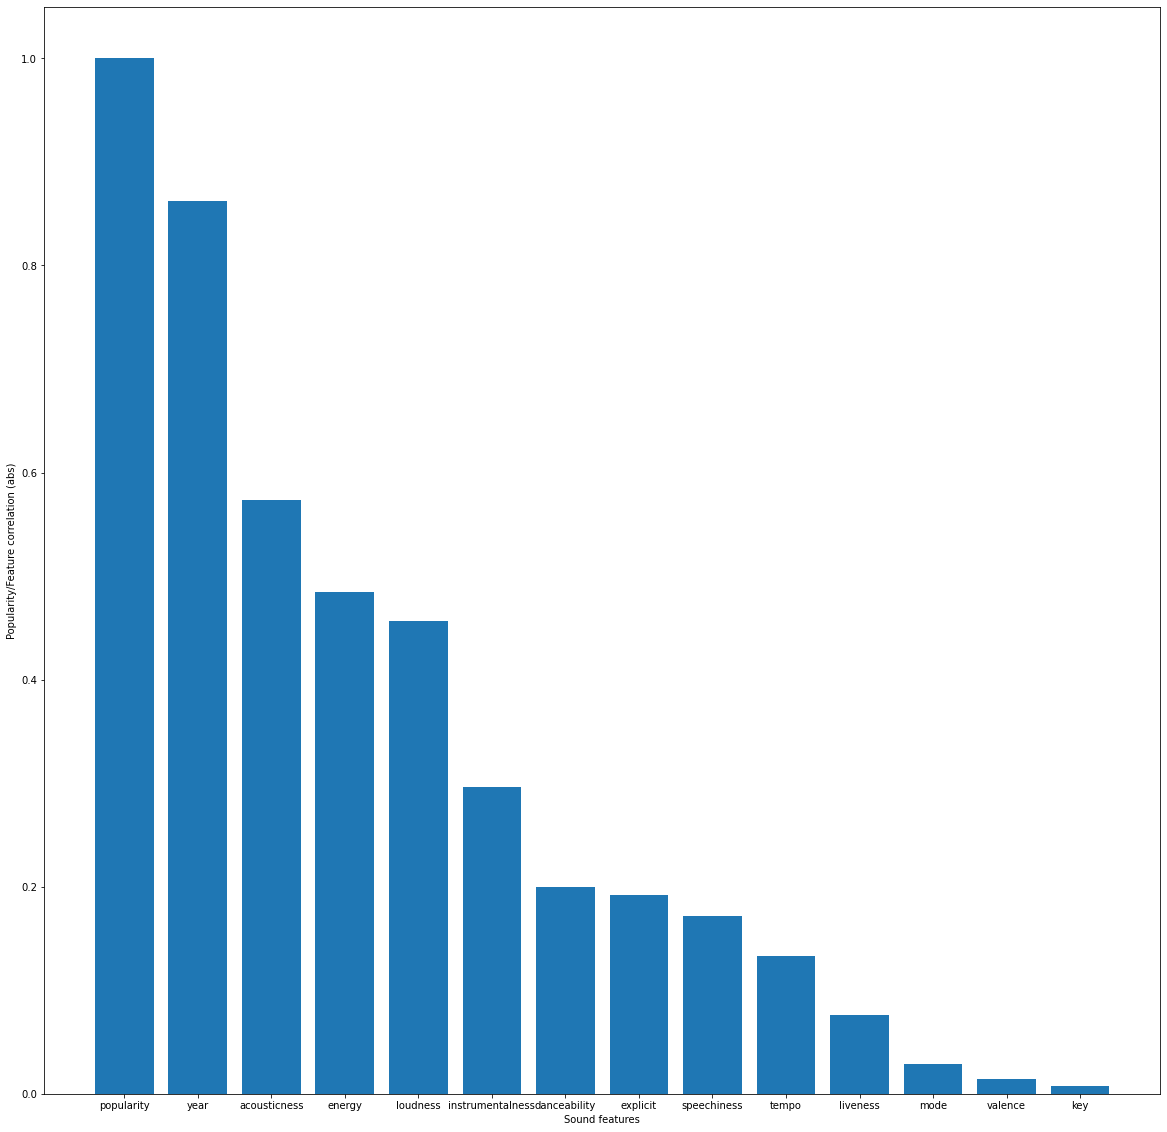

In [3]:
import matplotlib.pyplot as plt
import numpy as np

corr = abs(df.corr()['popularity']).sort_values(ascending=False)

x = np.arange(corr.size)
plt.figure(figsize=(20,20))
plt.bar(x, corr)
plt.xticks(x, corr.keys())
plt.xlabel('Sound features')
plt.ylabel('Popularity/Feature correlation (abs)')
plt.show()

# Para finalizar
Para completar la limpieza de nuestro dataset, lo preparamos para el modelo que vamos a utilizar. En este caso se trata de `LogisticRegression` de la librería de Machine Learning de `pyspark`. Este modelo en concreto recibe en su entrenamiento una lista de `features`, que son las variables que describen cada objeto (en nuestro caso serán los datos más correlacionados con la popularidad que anteriormente estudiamos) y las `labels` que en nuestro caso será la popularidad de cada canción. Exportamos estos datos en el archivo `spotify_model.csv`

In [4]:

dataDict = {    'label'         :   df['popularity'].to_list(),
                'year'          :   df['year'].to_list(),
                'acousticness'  :   df['acousticness'].to_list(),
                'energy'        :   df['energy'].to_list()#,
                #'loudness'      :   df['loudness'].to_list()    
            }

spotify = pd.DataFrame(data=dataDict)

spotify.to_csv('spotify_model.csv', sep=',', index=False,)